### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [16]:
# Se agrega una columna identificadora a cada DataFrame para distinguir las tiendas
tienda["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

# Se concatenan las tiendas en un solo DataFrame para análisis conjunto
df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Cálculo de la facturación total por tienda sumando la columna 'Precio'
facturacion_total = df.groupby("Tienda")["Precio"].sum().reset_index()

# Se transforma el resultado a millones de pesos para facilitar la lectura
facturacion_total["Precio"] = facturacion_total["Precio"] / 1_000_000
facturacion_total = facturacion_total.rename(columns={"Precio": "Facturación Total (MM$)"})

# Mostramos la tabla con los resultados
facturacion_total

,Tienda,Facturación Total (MM$)
0,Tienda 1,1150.8804
1,Tienda 2,1116.3435
2,Tienda 3,1098.0196
3,Tienda 4,1038.3757


/tmp/ipython-input-3565164714.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=facturacion_total, x="Facturación Total (MM$)", y="Tienda", palette="Blues_d")


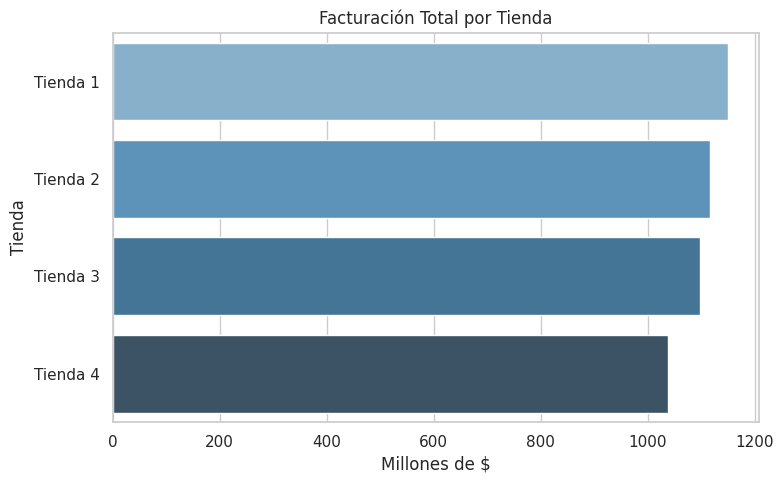

In [17]:
# Visualización: Gráfico de barras con la facturación total por tienda
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=facturacion_total, x="Facturación Total (MM$)", y="Tienda", palette="Blues_d")
plt.title("Facturación Total por Tienda")
plt.xlabel("Millones de $")
plt.ylabel("Tienda")
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [8]:
# Agrupar los datos por tienda y categoría, y contar la cantidad de productos vendidos
ventas_categoria = df.groupby(["Tienda", "Categoría del Producto"]).size().reset_index(name="Cantidad Vendida")

# Mostrar la tabla resultante
ventas_categoria

,Tienda,Categoría del Producto,Cantidad Vendida
0,Tienda 1,Artículos para el hogar,171
1,Tienda 1,Deportes y diversión,284
2,Tienda 1,Electrodomésticos,312
3,Tienda 1,Electrónicos,448
4,Tienda 1,Instrumentos musicales,182
5,Tienda 1,Juguetes,324
6,Tienda 1,Libros,173
7,Tienda 1,Muebles,465
8,Tienda 2,Artículos para el hogar,181
9,Tienda 2,Deportes y diversión,275


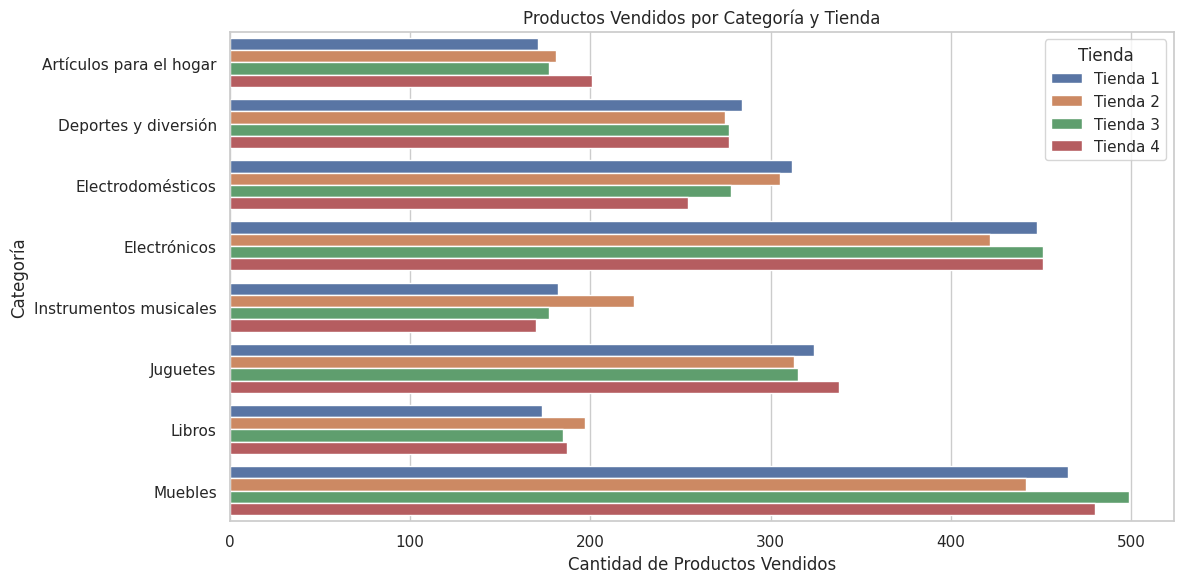

In [9]:
# Visualización de las categorías más populares por tienda
plt.figure(figsize=(12, 6))
sns.barplot(data=ventas_categoria, x="Cantidad Vendida", y="Categoría del Producto", hue="Tienda")
plt.title("Productos Vendidos por Categoría y Tienda")
plt.xlabel("Cantidad de Productos Vendidos")
plt.ylabel("Categoría")
plt.legend(title="Tienda")
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [10]:
# Cálculo de la calificación promedio de los clientes por tienda
calificacion_promedio = df.groupby("Tienda")["Calificación"].mean().round(2).reset_index(name="Calificación Promedio")

# Mostrar resultados
calificacion_promedio

,Tienda,Calificación Promedio
0,Tienda 1,3.98
1,Tienda 2,4.04
2,Tienda 3,4.05
3,Tienda 4,4.00


/tmp/ipython-input-403134273.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=calificacion_promedio, x="Calificación Promedio", y="Tienda", palette="Greens_d")


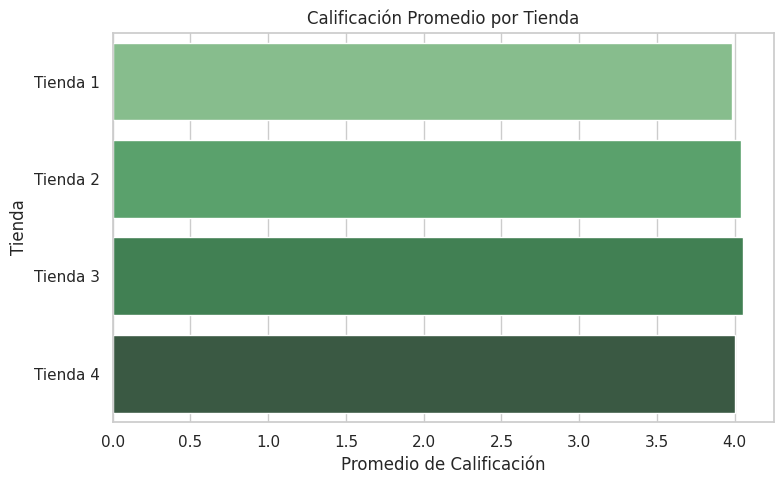

In [11]:
# Visualización de la calificación promedio por tienda
plt.figure(figsize=(8, 5))
sns.barplot(data=calificacion_promedio, x="Calificación Promedio", y="Tienda", palette="Greens_d")
plt.title("Calificación Promedio por Tienda")
plt.xlabel("Promedio de Calificación")
plt.ylabel("Tienda")
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [12]:
# Calcular la cantidad vendida por producto y tienda
ventas_productos = df.groupby(["Tienda", "Producto"]).size().reset_index(name="Cantidad Vendida")

# Extraer el producto más y menos vendido por tienda
mas_vendidos = ventas_productos.sort_values("Cantidad Vendida", ascending=False).groupby("Tienda").head(1)
menos_vendidos = ventas_productos.sort_values("Cantidad Vendida", ascending=True).groupby("Tienda").head(1)

# Unir ambos resultados
productos_extremos = pd.merge(mas_vendidos, menos_vendidos, on="Tienda", suffixes=("_Más_Vendido", "_Menos_Vendido"))

# Mostrar la tabla final
productos_extremos



,Tienda,Producto_Más_Vendido,Cantidad Vendida_Más_Vendido,Producto_Menos_Vendido,Cantidad Vendida_Menos_Vendido
0,Tienda 2,Iniciando en programación,65,Juego de mesa,32
1,Tienda 4,Cama box,62,Guitarra eléctrica,33
2,Tienda 1,TV LED UHD 4K,60,Auriculares con micrófono,33
3,Tienda 3,Kit de bancas,57,Bloques de construcción,35


# 5. Envío promedio por tienda

In [13]:
# Calcular el costo promedio de envío por tienda
envio_promedio = df.groupby("Tienda")["Costo de envío"].mean().round(2).reset_index(name="Costo Promedio de Envío")

# Mostrar resultados
envio_promedio

,Tienda,Costo Promedio de Envío
0,Tienda 1,26018.61
1,Tienda 2,25216.24
2,Tienda 3,24805.68
3,Tienda 4,23459.46


/tmp/ipython-input-1332521547.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=envio_promedio, x="Costo Promedio de Envío", y="Tienda", palette="Oranges_d")


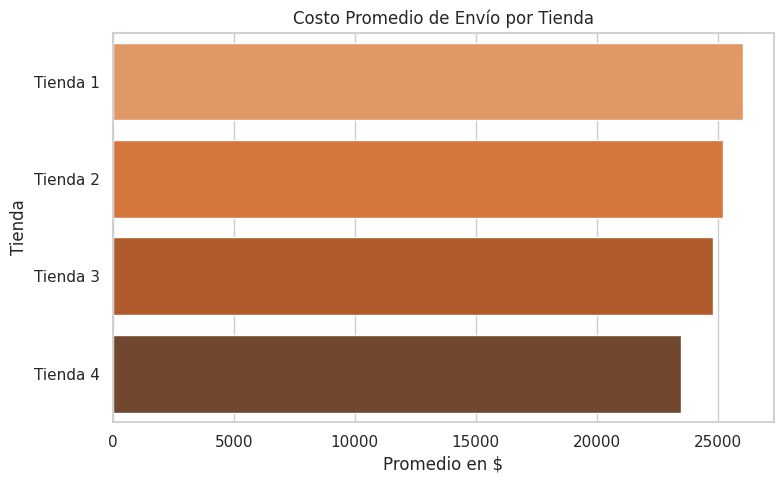

In [14]:
# Visualización del costo promedio de envío por tienda
plt.figure(figsize=(8, 5))
sns.barplot(data=envio_promedio, x="Costo Promedio de Envío", y="Tienda", palette="Oranges_d")
plt.title("Costo Promedio de Envío por Tienda")
plt.xlabel("Promedio en $")
plt.ylabel("Tienda")
plt.tight_layout()
plt.show()

# **6.- Informe Final**

Con base en los análisis realizados, se presentan las siguientes observaciones:

- **Facturación Total**: La Tienda 4 tiene la menor facturación, mientras que la Tienda 1 lidera con más de 1.150 Millones.
- **Ventas por Categoría**: Aunque todas destacan en Muebles, Tienda 4 no tiene una categoría significativamente sobresaliente.
- **Calificación Promedio**: Tienda 1 tiene la peor evaluación (3.98), siendo superada por Tienda 2 (4.04) y Tienda 3 (4.05).
- **Productos Más y Menos Vendidos**: En Tienda 4, los productos más vendidos no destacan tanto como en otras tiendas.
- **Costo Promedio de Envío**: Tienda 4 tiene el menor costo promedio de envío (23.459 $), lo que es una fortaleza.

### Recomendación

A pesar del bajo costo de envío, la **Tienda 4** tiene el desempeño general más débil:
- Menores ingresos totales.
- Calificaciones promedio por debajo de otras con mejor rendimiento.
- Categorías y productos sin diferenciación destacada.

Se recomienda al Sr. Juan considerar **vender la Tienda 4** y reinvertir en un nuevo negocio con mejor potencial.